In [145]:
from langchain_ollama import OllamaEmbeddings
from langchain_experimental.text_splitter import SemanticChunker
import numpy as np
from utility import embed_dataset, print_processed_chunks, extract_descriptors, extract_all_descriptors, visualize_kp_on_img, compare_image, fit_Kmeans_model, build_histograms, embed_chunks_for_cosine, prepare_chunks_for_similarity, semantic_chunk_dataset
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
from tqdm import tqdm
from sklearn.cluster import KMeans


In [144]:
# Reload utility file, run the 1st cell after running this cell

import importlib
import utility
importlib.reload(utility)

<module 'utility' from 'c:\\Users\\User\\SC4020 Project 1\\utility.py'>

In [88]:
import pandas as pd
df = pd.read_csv("News Article Dataset.csv")
article_texts = df["Article text"]
article_texts.head()

C:\Users\User\AppData\Local\Temp\ipykernel_37788\1875635243.py:2: DtypeWarning: Columns (0,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26

0     (CNN)Right now, there's a shortage of truck d...
1     (CNN)Working in a factory or warehouse can me...
2     (CNN)In a Hong Kong warehouse, a swarm of aut...
3    New York (CNN Business)For many years, the wor...
4    The European Union formally approved on Tuesda...
Name: Article text, dtype: object

In [147]:
texts = article_texts.dropna().tolist()
texts = texts[:5]

# Chunk paragraphs of texts into semantic meanings
chunks = semantic_chunk_dataset(texts)

# Clean up each chunk using regex, then tokenize them for Jaccard, and ' '.joining them for cosine similarity embedding
preprocessed_chunks = prepare_chunks_for_similarity(chunks)

# Embed chunks[cleaned_text] into vectors
processed_chunks = embed_chunks_for_cosine(preprocessed_chunks)


In [148]:
print_processed_chunks(processed_chunks)

--- Chunk 1 ---
Original Text:  (CNN)Right now, there's a shortage of truck drivers in the US and worldwide, exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks, and sever ...
Cleaned Text: cnnright now theres a shortage of truck drivers in the us and worldwide exacerbated by the ecommerce boom brought on by the pandemic one solution to the problem is autonomous trucks and several compan ...
Token Set: ['motor', 'largest', 'lowpressure', 'offer', 'switch', 'ferries', 'half', 'simply', 'herehide', 'what', 'problem', 'prototype', '90', 'service', 'around', 'had', 'running', 'between', 'tracks', 'most'] ...
Embedding Vector (first 10 values): [0.025109958, 0.027093848, -0.028489752, 0.026117349, 0.024269547, 0.011324266, -0.02171791, -0.0010936203, 0.04736905, 0.032958116]
Embedding Length: 1024

--- Chunk 2 ---
Original Text: The pickup and the dropoff were handled by a human driver, but for the bulk of the route -- from Tucson 

In [91]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityajn105/flickr8k")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\adityajn105\flickr8k\versions\1


In [92]:
img_dir = os.path.join(path, "Images")
image_files = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.lower().endswith('.jpg')]
image_files = image_files[:100]


In [68]:
print(image_files)

['C:\\Users\\User\\.cache\\kagglehub\\datasets\\adityajn105\\flickr8k\\versions\\1\\Images\\1000268201_693b08cb0e.jpg', 'C:\\Users\\User\\.cache\\kagglehub\\datasets\\adityajn105\\flickr8k\\versions\\1\\Images\\1001773457_577c3a7d70.jpg', 'C:\\Users\\User\\.cache\\kagglehub\\datasets\\adityajn105\\flickr8k\\versions\\1\\Images\\1002674143_1b742ab4b8.jpg', 'C:\\Users\\User\\.cache\\kagglehub\\datasets\\adityajn105\\flickr8k\\versions\\1\\Images\\1003163366_44323f5815.jpg', 'C:\\Users\\User\\.cache\\kagglehub\\datasets\\adityajn105\\flickr8k\\versions\\1\\Images\\1007129816_e794419615.jpg', 'C:\\Users\\User\\.cache\\kagglehub\\datasets\\adityajn105\\flickr8k\\versions\\1\\Images\\1007320043_627395c3d8.jpg', 'C:\\Users\\User\\.cache\\kagglehub\\datasets\\adityajn105\\flickr8k\\versions\\1\\Images\\1009434119_febe49276a.jpg', 'C:\\Users\\User\\.cache\\kagglehub\\datasets\\adityajn105\\flickr8k\\versions\\1\\Images\\1012212859_01547e3f17.jpg', 'C:\\Users\\User\\.cache\\kagglehub\\datasets\\

In [131]:
all_descriptors = extract_all_descriptors(image_files)

Extracting ORB features:   4%|▍         | 4/100 [00:00<00:02, 35.19it/s]

[[[ 77  56  58]
  [130 131 115]
  [117 123 106]
  ...
  [  2   4   4]
  [  2   4   4]
  [  4   6   6]]

 [[ 73  55  56]
  [126 132 115]
  [117 123 106]
  ...
  [  5   5   5]
  [ 13  17  12]
  [  2   8   3]]

 [[ 69  51  52]
  [123 130 115]
  [119 125 108]
  ...
  [  6  11  10]
  [  6   9   7]
  [  3   4   2]]

 ...

 [[ 11  78 193]
  [ 41 154 221]
  [116 244 243]
  ...
  [204 185 170]
  [205 184 169]
  [193 185 168]]

 [[ 31  88 187]
  [137 239 252]
  [ 99 196 255]
  ...
  [202 186 170]
  [203 184 169]
  [193 184 170]]

 [[ 25 100 200]
  [ 26 106 199]
  [  6  66 166]
  ...
  [201 186 170]
  [200 184 167]
  [192 183 169]]]
<class 'numpy.ndarray'> (500, 375, 3)
[[[108 103 102]
  [101  96  95]
  [105 100  99]
  ...
  [ 21  29  29]
  [ 23  28  31]
  [ 22  25  30]]

 [[114 109 108]
  [106 101 100]
  [100  95  94]
  ...
  [ 29  37  37]
  [ 29  34  37]
  [ 25  28  33]]

 [[120 112 112]
  [126 118 118]
  [108 100 100]
  ...
  [ 32  40  40]
  [ 29  34  37]
  [ 26  31  34]]

 ...

 [[114 101 103

Extracting ORB features:  12%|█▏        | 12/100 [00:00<00:02, 36.23it/s]

[[[ 37  57  62]
  [ 15  59  58]
  [  8  65  67]
  ...
  [ 70  70  70]
  [ 75  74  76]
  [ 66  71  74]]

 [[ 43  42  76]
  [ 51  55  96]
  [ 62  62 110]
  ...
  [ 65  64  66]
  [ 61  63  71]
  [ 49  59  69]]

 [[ 22  51  56]
  [ 21  51  68]
  [ 44  69  89]
  ...
  [ 68  75  68]
  [ 76  81  82]
  [ 60  68  75]]

 ...

 [[244 244 244]
  [246 244 244]
  [245 243 243]
  ...
  [243 247 248]
  [239 244 245]
  [236 241 242]]

 [[243 242 244]
  [245 244 246]
  [247 244 246]
  ...
  [253 253 253]
  [251 253 253]
  [250 252 252]]

 [[249 250 248]
  [254 255 253]
  [255 253 252]
  ...
  [254 255 253]
  [255 255 254]
  [255 255 254]]]
<class 'numpy.ndarray'> (375, 500, 3)
[[[146 154 117]
  [120 134 100]
  [144 137 112]
  ...
  [ 70 135  86]
  [ 66 125  80]
  [ 68 124  81]]

 [[147 154 117]
  [124 133 100]
  [136 133 105]
  ...
  [ 49 122  72]
  [ 47 112  66]
  [ 52 113  69]]

 [[159 163 128]
  [145 149 114]
  [142 145 113]
  ...
  [ 44 118  70]
  [ 45 110  65]
  [ 51 110  65]]

 ...

 [[ 95 145 111

Extracting ORB features:  21%|██        | 21/100 [00:00<00:02, 38.65it/s]

[[[ 44  75  46]
  [ 35  74  53]
  [ 51  92  77]
  ...
  [ 74 101  85]
  [ 46 102  59]
  [ 50 127  90]]

 [[ 41  90  68]
  [ 66 114  88]
  [ 32  68  52]
  ...
  [ 57  82  56]
  [ 62  97  70]
  [ 69 119  85]]

 [[ 92 141 125]
  [ 61  90  67]
  [ 35  65  54]
  ...
  [ 69  97  77]
  [112 138 132]
  [ 37  74  54]]

 ...

 [[ 93 175 152]
  [ 82 183 161]
  [100 192 173]
  ...
  [ 88 166 149]
  [ 96 180 162]
  [100 174 162]]

 [[ 90 171 152]
  [ 67 165 143]
  [ 49 158 136]
  ...
  [ 88 184 178]
  [ 75 200 185]
  [ 70 178 156]]

 [[ 78 169 144]
  [ 94 156 134]
  [104 153 139]
  ...
  [ 71 179 156]
  [ 80 199 178]
  [ 75 160 138]]]
<class 'numpy.ndarray'> (303, 500, 3)
[[[130 124 125]
  [131 125 126]
  [134 128 129]
  ...
  [ 22  24  32]
  [ 27  28  32]
  [ 33  39  38]]

 [[150 146 141]
  [153 149 144]
  [152 148 143]
  ...
  [ 30  29  31]
  [ 32  30  29]
  [ 31  32  28]]

 [[126 126 114]
  [107 106  96]
  [113 112 102]
  ...
  [ 28  28  28]
  [ 32  29  25]
  [ 21  23  17]]

 ...

 [[140 113  93

Extracting ORB features:  30%|███       | 30/100 [00:00<00:01, 41.42it/s]

[[[131 180 178]
  [106 165 161]
  [155 229 211]
  ...
  [ 79  85  90]
  [ 59  62  66]
  [ 74  79  78]]

 [[212 229 226]
  [ 99 147 151]
  [128 191 181]
  ...
  [ 80  87  90]
  [ 61  65  66]
  [ 80  82  82]]

 [[244 255 255]
  [108 163 154]
  [104 168 168]
  ...
  [ 78  86  85]
  [ 60  65  63]
  [ 86  90  85]]

 ...

 [[ 72 104 115]
  [ 96 124 135]
  [104 136 142]
  ...
  [ 65  65  65]
  [ 57  60  58]
  [ 63  67  62]]

 [[107 123 140]
  [112 128 144]
  [106 125 140]
  ...
  [ 67  69  63]
  [ 75  78  69]
  [ 72  75  66]]

 [[ 98 126 143]
  [101 133 144]
  [ 94 120 136]
  ...
  [ 67  67  67]
  [ 82  81  77]
  [ 68  65  61]]]
<class 'numpy.ndarray'> (375, 500, 3)
[[[163 156 147]
  [156 152 134]
  [146 145 124]
  ...
  [  2  21 126]
  [  0   3 142]
  [ 11  21 175]]

 [[171 155 149]
  [163 149 150]
  [160 152 153]
  ...
  [190 221 212]
  [ 87 120 169]
  [  7  40 143]]

 [[172 154 137]
  [174 161 145]
  [152 149 134]
  ...
  [249 238 241]
  [237 255 247]
  [192 231 223]]

 ...

 [[151 143 153

Extracting ORB features:  40%|████      | 40/100 [00:01<00:01, 41.99it/s]

[[[ 5  3  3]
  [ 3  1  1]
  [ 3  3  3]
  ...
  [10  9 19]
  [15 11 22]
  [17 11 22]]

 [[ 3  1  1]
  [ 1  0  2]
  [ 5  4  6]
  ...
  [16 16 28]
  [18 16 28]
  [14 10 22]]

 [[ 4  4  4]
  [ 0  0  1]
  [11 10 14]
  ...
  [ 9  9 21]
  [ 6  6 18]
  [12 10 22]]

 ...

 [[14 17 38]
  [19 24 49]
  [19 25 54]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[23 26 41]
  [14 20 39]
  [27 35 58]
  ...
  [ 1  1  1]
  [ 2  2  2]
  [ 2  2  2]]

 [[26 26 42]
  [13 17 35]
  [18 25 44]
  ...
  [ 1  1  1]
  [ 2  2  2]
  [ 3  3  3]]]
<class 'numpy.ndarray'> (351, 500, 3)
[[[165 135 100]
  [156 127  96]
  [160 133 107]
  ...
  [202 193 180]
  [199 190 177]
  [198 189 175]]

 [[159 129 102]
  [164 133 108]
  [159 128 103]
  ...
  [200 191 177]
  [198 189 175]
  [196 187 173]]

 [[162 132 107]
  [161 131 104]
  [161 129 100]
  ...
  [198 190 173]
  [196 188 171]
  [195 187 170]]

 ...

 [[ 22  23  21]
  [ 19  20  18]
  [ 22  23  21]
  ...
  [ 42  48  43]
  [ 44  57  55]
  [ 44  60  59]]

 [[ 22  23  21]
  

Extracting ORB features:  50%|█████     | 50/100 [00:01<00:01, 43.74it/s]

[[[ 48  44  49]
  [ 52  53  51]
  [ 41  46  37]
  ...
  [ 56  74  73]
  [ 81  96  98]
  [ 46  49  57]]

 [[ 43  42  46]
  [ 43  41  40]
  [ 48  48  42]
  ...
  [ 38  40  48]
  [ 57  63  70]
  [ 91  97 104]]

 [[ 47  46  48]
  [ 42  38  37]
  [ 43  38  35]
  ...
  [ 68  62  79]
  [ 97  98 112]
  [ 61  71  78]]

 ...

 [[254 253 233]
  [247 246 220]
  [255 255 246]
  ...
  [111 101 114]
  [ 89  77  95]
  [138 133 142]]

 [[255 252 243]
  [251 250 236]
  [255 254 253]
  ...
  [126 116 129]
  [ 70  58  78]
  [ 86  80  91]]

 [[241 230 222]
  [255 255 243]
  [255 254 253]
  ...
  [108  99 112]
  [ 74  68  87]
  [ 74  79  88]]]
<class 'numpy.ndarray'> (500, 375, 3)
[[[ 59  72  70]
  [ 59  72  70]
  [ 48  61  59]
  ...
  [183 160 144]
  [180 157 141]
  [188 165 149]]

 [[ 44  57  55]
  [ 50  63  61]
  [ 54  67  65]
  ...
  [178 155 139]
  [183 160 144]
  [181 158 142]]

 [[ 35  48  46]
  [ 37  50  48]
  [ 44  57  55]
  ...
  [181 157 139]
  [183 159 141]
  [182 158 140]]

 ...

 [[ 51  37  43

Extracting ORB features:  55%|█████▌    | 55/100 [00:01<00:01, 42.01it/s]

[[[158 181 177]
  [155 178 174]
  [154 177 173]
  ...
  [138 161 157]
  [139 162 158]
  [152 173 170]]

 [[138 159 157]
  [153 174 172]
  [159 180 178]
  ...
  [152 171 179]
  [152 171 179]
  [154 173 180]]

 [[166 184 185]
  [158 178 179]
  [159 179 180]
  ...
  [162 186 186]
  [163 187 187]
  [162 186 186]]

 ...

 [[156 177 179]
  [160 179 182]
  [165 184 187]
  ...
  [160 184 182]
  [158 182 182]
  [155 181 181]]

 [[154 175 177]
  [154 173 176]
  [156 173 176]
  ...
  [166 187 188]
  [159 183 183]
  [156 181 183]]

 [[148 170 175]
  [150 170 175]
  [152 171 176]
  ...
  [165 185 190]
  [163 185 191]
  [160 184 190]]]
<class 'numpy.ndarray'> (375, 500, 3)
[[[ 30  81  73]
  [ 25  82  74]
  [ 26  74  68]
  ...
  [ 44 102  97]
  [ 42 102  96]
  [ 36  96  90]]

 [[ 38  92  85]
  [ 38  97  89]
  [ 41  95  88]
  ...
  [ 47 106  98]
  [ 46 105  97]
  [ 42 102  94]]

 [[ 53 107 102]
  [ 51 107 102]
  [ 56 110 105]
  ...
  [ 50 109 101]
  [ 48 107  99]
  [ 50 109 101]]

 ...

 [[ 43  94  86

Extracting ORB features:  65%|██████▌   | 65/100 [00:01<00:00, 43.59it/s]

[[[124  76  48]
  [125  75  47]
  [125  74  48]
  ...
  [139  95  66]
  [134  88  64]
  [136  89  61]]

 [[123  76  49]
  [122  73  47]
  [124  73  47]
  ...
  [138  89  63]
  [138  85  64]
  [136  85  59]]

 [[122  76  52]
  [122  74  50]
  [122  72  49]
  ...
  [135  88  61]
  [136  86  66]
  [134  84  61]]

 ...

 [[ 54  58  59]
  [ 54  58  63]
  [ 55  59  64]
  ...
  [100  76  64]
  [ 96  77  64]
  [104  77  63]]

 [[ 51  50  52]
  [ 51  52  56]
  [ 51  52  56]
  ...
  [109  84  68]
  [101  81  63]
  [104  76  59]]

 [[ 47  47  47]
  [ 52  51  55]
  [ 54  51  53]
  ...
  [ 95  68  54]
  [ 94  71  56]
  [100  69  54]]]
<class 'numpy.ndarray'> (500, 375, 3)
[[[  1   5   6]
  [  4   6   6]
  [  4   6   6]
  ...
  [ 49  45  40]
  [ 49  45  40]
  [ 49  45  40]]

 [[  2   4   5]
  [  3   5   6]
  [  4   6   7]
  ...
  [ 55  47  40]
  [ 56  48  41]
  [ 57  49  42]]

 [[  4   5   9]
  [  4   6   7]
  [  5   4   6]
  ...
  [ 63  54  41]
  [ 64  55  42]
  [ 66  57  44]]

 ...

 [[  7   5   4

Extracting ORB features:  75%|███████▌  | 75/100 [00:01<00:00, 44.03it/s]

[[[ 37  41  59]
  [ 21  38  59]
  [ 31  34  55]
  ...
  [ 12   8  19]
  [ 13   9  20]
  [  9   5  17]]

 [[ 50  72 108]
  [ 50  60  90]
  [ 48  61  93]
  ...
  [  6   7  17]
  [  5   6  16]
  [  4   5  15]]

 [[ 54  72 103]
  [ 36  60  96]
  [ 36  61  87]
  ...
  [  6   8  16]
  [  5   6  16]
  [  6   6  20]]

 ...

 [[118  96  91]
  [119  94  90]
  [120  97  95]
  ...
  [125  99  92]
  [120  94  88]
  [113  89  83]]

 [[119  98  90]
  [121  97  91]
  [119  96  94]
  ...
  [127 101  95]
  [127 101  95]
  [125 100  96]]

 [[117  95  90]
  [121 100  98]
  [115  96  93]
  ...
  [126 100  94]
  [123 100  92]
  [122 101  93]]]
<class 'numpy.ndarray'> (375, 500, 3)
[[[ 91  32  22]
  [ 86  40  16]
  [ 87  39  21]
  ...
  [115  63  40]
  [115  62  35]
  [113  61  31]]

 [[ 88  38  16]
  [ 87  37  17]
  [ 89  34  19]
  ...
  [116  60  35]
  [117  63  33]
  [118  64  34]]

 [[ 88  37  17]
  [ 89  36  26]
  [ 92  39  19]
  ...
  [115  60  33]
  [116  62  32]
  [116  65  33]]

 ...

 [[124  89  79

Extracting ORB features:  85%|████████▌ | 85/100 [00:02<00:00, 41.87it/s]

[[[186 125  63]
  [186 125  63]
  [185 127  62]
  ...
  [ 48  42  97]
  [ 56  50 105]
  [ 57  52 107]]

 [[186 125  63]
  [187 126  62]
  [189 128  64]
  ...
  [ 49  42  99]
  [ 57  49 109]
  [ 56  48 108]]

 [[188 127  63]
  [189 128  64]
  [190 130  64]
  ...
  [ 53  42 104]
  [ 60  52 113]
  [ 59  51 112]]

 ...

 [[158 147 149]
  [140 133 124]
  [139 135 130]
  ...
  [177 174 166]
  [152 154 154]
  [162 169 172]]

 [[125 109 126]
  [153 147 148]
  [186 190 184]
  ...
  [175 172 167]
  [159 161 162]
  [152 158 163]]

 [[141 127 138]
  [157 152 179]
  [160 160 166]
  ...
  [171 170 166]
  [163 167 168]
  [148 155 158]]]
<class 'numpy.ndarray'> (500, 375, 3)
[[[ 24  33  42]
  [ 34  44  51]
  [ 24  32  39]
  ...
  [ 14  14  14]
  [ 12  12  12]
  [ 12  12  12]]

 [[ 25  35  42]
  [ 29  38  42]
  [ 21  30  33]
  ...
  [ 14  14  14]
  [ 13  13  13]
  [ 13  13  13]]

 [[ 27  35  48]
  [ 31  39  52]
  [ 29  35  46]
  ...
  [ 12  12  12]
  [ 11  11  11]
  [ 12  12  12]]

 ...

 [[176 167 158

Extracting ORB features:  95%|█████████▌| 95/100 [00:02<00:00, 41.64it/s]

[[[239 158  61]
  [236 153  61]
  [239 152  64]
  ...
  [243 150  63]
  [242 152  64]
  [241 153  63]]

 [[241 157  62]
  [238 153  61]
  [238 150  60]
  ...
  [242 150  61]
  [243 151  62]
  [241 151  62]]

 [[241 154  62]
  [240 153  59]
  [240 153  57]
  ...
  [243 152  61]
  [243 152  61]
  [243 151  62]]

 ...

 [[252 234 169]
  [251 233 168]
  [254 234 169]
  ...
  [ 66  50  33]
  [ 68  51  32]
  [ 53  41  23]]

 [[252 234 169]
  [251 233 168]
  [251 233 168]
  ...
  [ 66  50  33]
  [ 65  50  31]
  [ 66  55  41]]

 [[251 233 168]
  [251 233 168]
  [250 233 166]
  ...
  [ 65  55  37]
  [ 58  48  30]
  [ 60  54  41]]]
<class 'numpy.ndarray'> (500, 375, 3)
[[[ 43  68  34]
  [ 52  67  63]
  [ 29  53  19]
  ...
  [242 221 206]
  [238 219 204]
  [241 222 207]]

 [[ 37  57  22]
  [ 84  93  72]
  [ 48  70  18]
  ...
  [238 221 208]
  [237 220 211]
  [239 223 217]]

 [[ 33  50  37]
  [ 49  70  67]
  [ 29  48  31]
  ...
  [240 227 201]
  [240 226 207]
  [243 230 216]]

 ...

 [[  5  19   7

Extracting ORB features: 100%|██████████| 100/100 [00:02<00:00, 41.20it/s]

[[[167 126  93]
  [166 127  95]
  [165 130  97]
  ...
  [177 140 102]
  [176 139 101]
  [178 141 103]]

 [[166 132  96]
  [165 130  96]
  [163 131  96]
  ...
  [178 140 106]
  [178 140 105]
  [179 141 106]]

 [[163 134  95]
  [164 135  98]
  [166 134  99]
  ...
  [178 140 105]
  [178 140 105]
  [179 141 106]]

 ...

 [[ 38 161 193]
  [ 41 157 190]
  [ 40 154 184]
  ...
  [ 35  49  72]
  [139 170 193]
  [115 164 186]]

 [[ 50 150 178]
  [ 57 153 176]
  [ 65 137 155]
  ...
  [  5  32  52]
  [117 154 174]
  [174 217 238]]

 [[ 61 150 170]
  [ 80 135 148]
  [ 76  95 102]
  ...
  [ 76 125 141]
  [ 58 110 127]
  [113 150 172]]]
<class 'numpy.ndarray'> (375, 500, 3)
[[[ 34  64  29]
  [ 14  56  25]
  [ 27  53  35]
  ...
  [122 176 153]
  [196 202 185]
  [201 212 202]]

 [[ 31  57  33]
  [ 20  54  43]
  [ 52  94  76]
  ...
  [125 184 180]
  [139 179 177]
  [124 174 156]]

 [[ 26  50  16]
  [ 69  89  77]
  [114 133 116]
  ...
  [183 230 214]
  [161 197 191]
  [141 168 164]]

 ...

 [[103 104  95

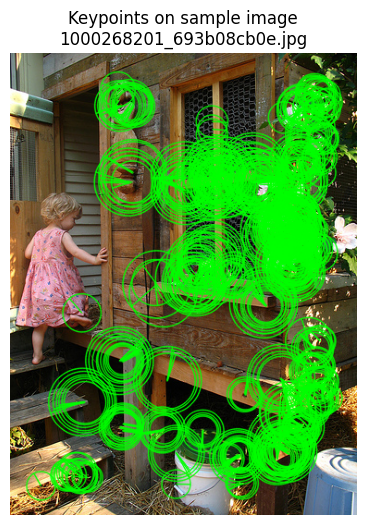

In [132]:
# Step 5: Visualize keypoints on one sample image
sample_img_path = image_files[0]

visualize_kp_on_img(sample_img_path)

In [133]:
num_clusters = 200
print("Running KMeans on all descriptors")

kmeans = fit_Kmeans_model(all_descriptors, num_clusters)

Running KMeans on all descriptors


In [134]:
image_histograms = build_histograms(all_descriptors, kmeans, num_clusters)
print("Image histograms shape:", image_histograms.shape)

Image histograms shape: (100, 200)


In [135]:
binary_hist = (image_histograms > 0).astype(int)

Top 5 similar images:
C:\Users\User\.cache\kagglehub\datasets\adityajn105\flickr8k\versions\1\Images\109260218_fca831f933.jpg (similarity: 0.591)
C:\Users\User\.cache\kagglehub\datasets\adityajn105\flickr8k\versions\1\Images\109202756_b97fcdc62c.jpg (similarity: 0.571)
C:\Users\User\.cache\kagglehub\datasets\adityajn105\flickr8k\versions\1\Images\1075867198_27ca2e7efe.jpg (similarity: 0.569)
C:\Users\User\.cache\kagglehub\datasets\adityajn105\flickr8k\versions\1\Images\1107471216_4336c9b328.jpg (similarity: 0.560)
C:\Users\User\.cache\kagglehub\datasets\adityajn105\flickr8k\versions\1\Images\1000268201_693b08cb0e.jpg (similarity: 0.557)


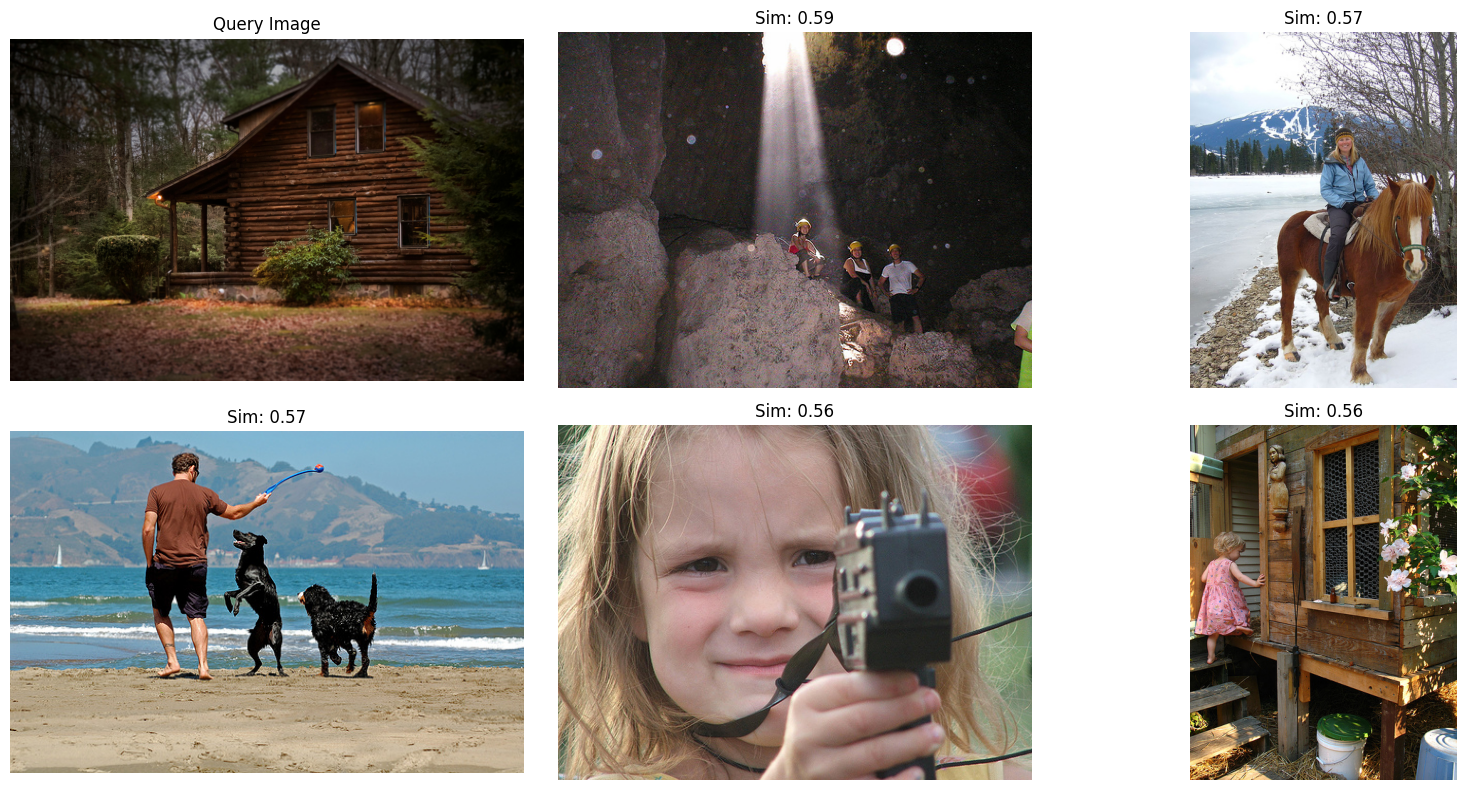

In [139]:
compare_image("pexels-fariphotography-803975.jpg", kmeans, num_clusters, image_histograms, image_files)